# Install Packages and import libraries

In [ ]:
!pip install pingouin

In [ ]:
# for data manipulation
import pandas as pd
import numpy as np
import os
import pickle

# for scoring
#from collections import Counter

# for statistical analysis
import pingouin as pg
from scipy.stats import shapiro, levene, permutation_test
from statsmodels.stats.multitest import multipletests

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the dataset for the the analysis

In [ ]:
with open('data_for_ex.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
b['split_3'].keys()

dict_keys(['d_idx', 'm_idx', 'i_idx', 'pred', 'true', 'types'])

In [ ]:
# Load datasets with linguistic features:
df1 = pd.read_csv('/content/Opinion_lingfeat.csv', encoding = "UTF-8")
df2 = pd.read_csv('/content/Memory_lingfeat.csv', encoding = "UTF-8")
df3 = pd.read_csv('/content/Intentions_lingfeat.csv', encoding = "UTF-8")

# Add empty columns

df1['pred'] = np.nan
df1['true'] = np.nan
df1['split'] = np.nan
df1.drop('labels', axis=1, inplace=True)

df2['pred'] = np.nan
df2['true'] = np.nan
df2['split'] = np.nan
df2.drop('memType', axis=1, inplace=True)

df3['pred'] = np.nan
df3['true'] = np.nan
df3['split'] = np.nan
df3.drop('outcome_class', axis=1, inplace=True)

Visualize the modified datasets:

In [ ]:
df1.head()

,ID,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,1,19,3,24,1.263158,2.2,90.46,22.98,1.00,1.00,...,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
1,1,36,3,66,1.941176,11.2,34.63,41.36,22.12,20.23,...,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
2,1,61,3,73,1.303571,7.0,77.87,13.44,37.69,89.90,...,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
3,1,34,3,42,1.272727,4.0,85.69,29.85,4.60,66.58,...,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
4,1,53,3,73,1.431373,7.6,71.14,48.72,18.63,49.04,...,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792,NaN,NaN,NaN


In [ ]:
df2.head()

,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,tone_pos,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,204,15,271,1.334975,5.0,83.15,29.85,78.94,95.42,6.37,...,2.45,10.29,3.211373,0.009804,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,187,16,219,1.196721,3.0,93.74,59.56,78.46,98.35,7.49,...,7.48,29.40,3.600000,0.016043,0.010695,0.005348,0.000000,NaN,NaN,NaN
2,269,21,337,1.266917,4.7,83.96,45.02,83.20,48.55,2.23,...,3.72,12.65,3.170789,0.022305,0.000000,0.000000,0.011152,NaN,NaN,NaN
3,167,15,207,1.254545,4.0,85.69,1.00,48.87,57.69,3.59,...,0.00,0.61,3.212000,0.011976,0.000000,0.000000,0.017964,NaN,NaN,NaN
4,165,15,195,1.203704,2.8,94.35,36.20,97.64,67.94,3.64,...,3.64,9.09,3.028000,0.024242,0.012121,0.000000,0.012121,NaN,NaN,NaN


In [ ]:
df3.head()

,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,tone_pos,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,101,6,133,1.316832,6.3,79.80,17.84,54.98,98.32,7.92,...,0.00,19.80,3.301081,2.970297,0.000000,0.990099,1.980198,NaN,NaN,NaN
1,20,1,26,1.368421,8.3,69.11,80.96,89.39,20.23,0.00,...,5.00,20.00,3.531667,5.000000,5.000000,0.000000,5.000000,NaN,NaN,NaN
2,41,2,54,1.317073,7.7,76.05,12.54,99.00,89.58,4.88,...,0.00,4.88,3.010833,0.000000,7.317073,4.878049,0.000000,NaN,NaN,NaN
3,36,2,45,1.250000,6.8,78.59,89.52,39.59,93.93,5.56,...,0.00,19.46,4.259167,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
4,63,3,80,1.269841,7.9,75.54,89.52,77.17,70.15,3.17,...,1.59,15.88,3.697368,3.174603,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
for i in b.keys():
  pred = b[i]['pred']
  true = b[i]['true']
  types = b[i]['types']

  df_temp = pd.DataFrame({'pred': pred, 'true': true, 'types': types})

  for t in ['A','B','C']:

    df_temp2 = df_temp[df_temp.types == t]
    if t == 'A':
      idx = b[i]['d_idx']
      df1.loc[df1.ID.isin(idx),'pred'] = df_temp2['pred'].to_numpy()
      df1.loc[df1.ID.isin(idx),'true'] = df_temp2['true'].to_numpy()
      df1.loc[df1.ID.isin(idx),'split'] = i
    elif t == 'B':
      idx = b[i]['m_idx']
      df2.loc[df2.index.isin(idx),'pred'] = df_temp2['pred'].to_numpy()
      df2.loc[df2.index.isin(idx),'true'] = df_temp2['true'].to_numpy()
      df2.loc[df2.index.isin(idx),'split'] = i
    else:
      idx = b[i]['i_idx']
      df3.loc[df3.index.isin(idx),'pred'] = df_temp2['pred'].to_numpy()
      df3.loc[df3.index.isin(idx),'true'] = df_temp2['true'].to_numpy()
      df3.loc[df3.index.isin(idx),'split'] = i


In [ ]:
df1.head()

,ID,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,1,19,3,24,1.263158,2.2,90.46,22.98,1.00,1.00,...,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000,F,F,split_1
1,1,36,3,66,1.941176,11.2,34.63,41.36,22.12,20.23,...,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000,T,T,split_1
2,1,61,3,73,1.303571,7.0,77.87,13.44,37.69,89.90,...,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000,T,T,split_1
3,1,34,3,42,1.272727,4.0,85.69,29.85,4.60,66.58,...,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000,F,F,split_1
4,1,53,3,73,1.431373,7.6,71.14,48.72,18.63,49.04,...,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792,T,T,split_1


In [ ]:
df1.isna().sum()

ID                        0
word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      0
true                      0
split                     0
dtype: int64

In [ ]:
df2.head()

,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,tone_pos,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,204,15,271,1.334975,5.0,83.15,29.85,78.94,95.42,6.37,...,2.45,10.29,3.211373,0.009804,0.000000,0.000000,0.000000,F,F,split_6
1,187,16,219,1.196721,3.0,93.74,59.56,78.46,98.35,7.49,...,7.48,29.40,3.600000,0.016043,0.010695,0.005348,0.000000,T,T,split_8
2,269,21,337,1.266917,4.7,83.96,45.02,83.20,48.55,2.23,...,3.72,12.65,3.170789,0.022305,0.000000,0.000000,0.011152,F,F,split_9
3,167,15,207,1.254545,4.0,85.69,1.00,48.87,57.69,3.59,...,0.00,0.61,3.212000,0.011976,0.000000,0.000000,0.017964,F,T,split_10
4,165,15,195,1.203704,2.8,94.35,36.20,97.64,67.94,3.64,...,3.64,9.09,3.028000,0.024242,0.012121,0.000000,0.012121,F,F,split_2


In [ ]:
df2.isna().sum()

word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      6
true                      6
split                     6
dtype: int64

In [ ]:
df2.dropna(inplace = True)
print(df2.shape)
df2.isna().sum()

(5500, 29)


word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      0
true                      0
split                     0
dtype: int64

In [ ]:
df3.head()

,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,tone_pos,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,101,6,133,1.316832,6.3,79.80,17.84,54.98,98.32,7.92,...,0.00,19.80,3.301081,2.970297,0.000000,0.990099,1.980198,F,T,split_10
1,20,1,26,1.368421,8.3,69.11,80.96,89.39,20.23,0.00,...,5.00,20.00,3.531667,5.000000,5.000000,0.000000,5.000000,T,T,split_7
2,41,2,54,1.317073,7.7,76.05,12.54,99.00,89.58,4.88,...,0.00,4.88,3.010833,0.000000,7.317073,4.878049,0.000000,T,T,split_8
3,36,2,45,1.250000,6.8,78.59,89.52,39.59,93.93,5.56,...,0.00,19.46,4.259167,0.000000,0.000000,0.000000,0.000000,T,T,split_4
4,63,3,80,1.269841,7.9,75.54,89.52,77.17,70.15,3.17,...,1.59,15.88,3.697368,3.174603,0.000000,0.000000,0.000000,F,T,split_4


In [ ]:
df3.isna().sum()

word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      0
true                      0
split                     0
dtype: int64

# Data Analysis

In [ ]:
# Concatenate the three datasets

scoring_df = pd.concat([df1,df2, df3], axis=0)
scoring_df.head()

,ID,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,1.0,19,3,24,1.263158,2.2,90.46,22.98,1.00,1.00,...,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000,F,F,split_1
1,1.0,36,3,66,1.941176,11.2,34.63,41.36,22.12,20.23,...,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000,T,T,split_1
2,1.0,61,3,73,1.303571,7.0,77.87,13.44,37.69,89.90,...,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000,T,T,split_1
3,1.0,34,3,42,1.272727,4.0,85.69,29.85,4.60,66.58,...,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000,F,F,split_1
4,1.0,53,3,73,1.431373,7.6,71.14,48.72,18.63,49.04,...,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792,T,T,split_1


In [ ]:
list(scoring_df.columns)

['ID',
 'word_counts',
 'num_sentences',
 'num_syllables',
 'avg_syllables_per_word',
 'fk_grade',
 'fk_read',
 'Analytic',
 'Authentic',
 'Tone',
 'tone_pos',
 'tone_neg',
 'focuspast',
 'focuspresent',
 'focusfuture',
 'Cognition',
 'memory',
 'Self-reference',
 'Other-reference',
 'Contextual Embedding',
 'Perceptual Details',
 'Reality Monitoring',
 'concr_score',
 'Temporal details',
 'Spatial details',
 'People',
 'Quantity details',
 'pred',
 'true',
 'split']

In [ ]:
scoring_df.shape

(9640, 30)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Number of unique splits
len_splits = len(scoring_df['split'].unique())

# Initialize a 3D numpy array to hold all confusion matrices
all_conf_matrices = np.zeros((len_splits, 2, 2))

# Accumulate confusion matrices for each split
for i, split in enumerate(scoring_df['split'].unique()):
    actual_split = scoring_df[scoring_df['split'] == split]['true'].values
    predicted_split = scoring_df[scoring_df['split'] == split]['pred'].values
    all_conf_matrices[i] = confusion_matrix(actual_split, predicted_split)

# Compute the average and standard deviation of the confusion matrices
average_confusion_matrix = all_conf_matrices.mean(axis=0)
std_deviation_confusion_matrix = all_conf_matrices.std(axis=0)

print("Average Confusion Matrix:")
print(average_confusion_matrix)
print("\nStandard Deviation Confusion Matrix:")
print(np.round(std_deviation_confusion_matrix,2))

Average Confusion Matrix:
[[391.7  92.2]
 [107.2 372.9]]

Standard Deviation Confusion Matrix:
[[14.06 11.86]
 [12.34 13.77]]


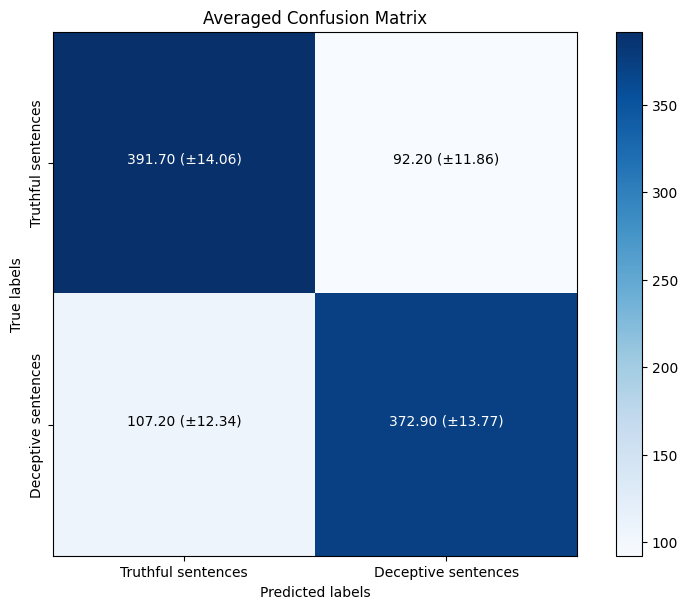

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(average_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Averaged Confusion Matrix')
plt.colorbar()

# Add tick marks
classes = ['Truthful sentences', 'Deceptive sentences']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes, rotation=90, va='center')

# Displaying the average and standard deviation values in the cells
thresh = average_confusion_matrix.max() / 2.
for i in range(average_confusion_matrix.shape[0]):
    for j in range(average_confusion_matrix.shape[1]):
        cell_text = "{} (±{})".format(
            format(average_confusion_matrix[i, j], '.2f'),
            format(std_deviation_confusion_matrix[i, j], '.2f'))
        plt.text(j, i, cell_text, horizontalalignment="center",
                 color="white" if average_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

##ANALYSIS FOR CORRECTED AND MISCLASSIFIED STATEMENTS

In [ ]:
# Compare 'label' and 'predicted_label' columns:
# True values means that 'label' and 'predicted_label' match, and False otherwise.
correct_class = scoring_df['true'] == scoring_df['pred']
print(np.unique(correct_class))

# Filter the DataFrame to keep only the rows where the label and predicted_label match (True in 'correct_class') and do not match (False in 'correct_class').
scoring_df_corrclass = scoring_df[correct_class] # correctly classified instances
scoring_df_misclass = scoring_df[~correct_class] # misclassified instances

[False  True]


In [ ]:
import numpy as np
import pingouin as pg
from statsmodels.stats.multitest import multipletests

# Given functions
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def bootstrap_cles_ci(x, y, alpha=0.05, n_boot=1000):
    boot_cles = []
    for _ in range(n_boot):
        sample_x = np.random.choice(x, size=len(x), replace=True)
        sample_y = np.random.choice(y, size=len(y), replace=True)
        cles = pg.compute_effsize(sample_x, sample_y, eftype='CLES')
        boot_cles.append(cles)
    lower = np.percentile(boot_cles, 100 * (alpha / 2))
    upper = np.percentile(boot_cles, 100 * (1 - alpha / 2))
    return (round((lower), 2), round((upper), 2))

def cohen_d_and_ci(x, y, confidence=0.95):
    d = pg.compute_effsize(x, y, paired=False, eftype='cohen')
    ci_low, ci_high = pg.compute_esci(stat=d, nx=len(x), ny=len(y), paired=False, eftype='cohen', confidence=confidence)
    return d, (ci_low, ci_high)

###MISCLASSIFIED

In [ ]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

    # Split misclassified  instances in true and false df
    scoring_df_mis_h = scoring_df_misclass[(scoring_df_misclass['true'] == 'T') & (scoring_df_misclass['split'] == split)]
    scoring_df_mis_d = scoring_df_misclass[(scoring_df_misclass['true'] == 'F') & (scoring_df_misclass['split'] == split)]

    scoring_df_misclass_h = scoring_df_mis_h.reset_index().drop(['true','pred','split','ID','index'], axis = 1)
    scoring_df_misclass_d = scoring_df_mis_d.reset_index().drop(['true','pred','split','ID','index'], axis = 1)

    # Initializing lists
    stats = []
    p_values = []
    cles_scores = []
    cles_cis = []  # For CLES CI
    cohens_d_scores = []  # For Cohen's d effect size
    cohens_d_cis = []  # For Cohen's d CI
    columns = scoring_df_misclass_h.columns

    for col in columns:
        # Stats and p-value computation
        res = permutation_test((scoring_df_misclass_h[col], scoring_df_misclass_d[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000)
        stats.append(res.statistic)
        p_values.append(res.pvalue)

        # CLES effect size and its CI:
        cles = pg.compute_effsize(scoring_df_misclass_h[col], scoring_df_misclass_d[col], eftype='CLES')
        cles_scores.append(cles)
        cles_ci = bootstrap_cles_ci(scoring_df_misclass_h[col], scoring_df_misclass_d[col])
        cles_cis.append(cles_ci)

        # Cohen's d effect size and its CI:
        cohens_d, cohens_d_ci = cohen_d_and_ci(scoring_df_misclass_h[col], scoring_df_misclass_d[col])
        cohens_d_scores.append(cohens_d)
        cohens_d_cis.append(cohens_d_ci)

    # Multiple comparisons correction
    null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

    # Save results in a dataframe
    perm_df = pd.DataFrame({
        "feature": columns,
        "stat": stats,
        "p_value": p_values,
        "corrected_p_value": corrected_p_values,
        "effect_size_cles":cles_scores,
        "cles_95%_CI": cles_cis,  # New column
        "effect_size_cohens_d": cohens_d_scores,  # New column
        "cohens_d_95%_CI": cohens_d_cis,  # New column
        "null_h_rejected": null_h_rej
    })

    perm_df["significance"] = ['*' if p else '-' for p in perm_df['null_h_rejected']]

    # Print all comparisons
    perm_df.sort_values(["null_h_rejected","effect_size_cles"], ascending=False, inplace=True)
    print(f"RESULTS FOR {split}")
    print(perm_df)

RESULTS FOR split_1
                   feature       stat   p_value  corrected_p_value  \
5                  fk_read   5.299606  0.000600           0.015598   
19      Perceptual Details   0.412809  0.105189           1.000000   
16          Self-reference   1.180602  0.042996           0.988901   
11               focuspast   0.986401  0.155584           1.000000   
13             focusfuture   0.556925  0.111989           1.000000   
17         Other-reference   0.598568  0.200580           1.000000   
1            num_sentences   1.067557  0.330767           1.000000   
22        Temporal details  -0.318165  0.293171           1.000000   
7                Authentic   5.377211  0.260574           1.000000   
20      Reality Monitoring   1.444919  0.322968           1.000000   
21             concr_score   0.002587  0.970303           1.000000   
24                  People   0.057498  0.642736           1.000000   
10                tone_neg   0.190418  0.548745           1.000000   


###COMPARING FALSE SENTENCES AND TRUE SENTENCES CLASSIFIED AS FALSE (false negative)

LABEL = FALSE

VS.

LABEL = TRUE & PREDICTED LABEL = FALSE

In [ ]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

    # True negatives are False sentences correctly classified as False
    true_neg = scoring_df[((scoring_df['true'] == 'F') & (scoring_df['pred']=='F')) & (scoring_df['split'] == split)]
    true_negative = true_neg.reset_index().drop(['true','pred','split','ID','index'],axis = 1)

    # False negatives are True sentences wrongly classified as False
    false_neg = scoring_df[((scoring_df['true'] == 'T') & (scoring_df['pred']=='F')) & (scoring_df['split'] == split)]
    false_negative = false_neg .reset_index().drop(['true','pred','split','ID','index'],axis = 1)

    # Initializing lists
    stats = []
    p_values = []
    cles_scores = []
    cles_cis = []  # For CLES CI
    cohens_d_scores = []  # For Cohen's d effect size
    cohens_d_cis = []  # For Cohen's d CI
    columns = true_negative.columns

    for col in columns:
        # Stats and p-value computation
        res = permutation_test((true_negative[col], false_negative[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000)
        stats.append(res.statistic)
        p_values.append(res.pvalue)

        # CLES effect size and its CI:
        cles = pg.compute_effsize(true_negative[col], false_negative[col], eftype='CLES')
        cles_scores.append(cles)
        cles_ci = bootstrap_cles_ci(true_negative[col], false_negative[col])
        cles_cis.append(cles_ci)

        # Cohen's d effect size and its CI:
        cohens_d, cohens_d_ci = cohen_d_and_ci(true_negative[col], false_negative[col])
        cohens_d_scores.append(cohens_d)
        cohens_d_cis.append(cohens_d_ci)

    # Multiple comparisons correction
    null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

    # Save results in a dataframe
    perm_df = pd.DataFrame({
        "feature": columns,
        "stat": stats,
        "p_value": p_values,
        "corrected_p_value": corrected_p_values,
        "effect_size_cles":cles_scores,
        "cles_95%_CI": cles_cis,  # New column
        "effect_size_cohens_d": cohens_d_scores,  # New column
        "cohens_d_95%_CI": cohens_d_cis,  # New column
        "null_h_rejected": null_h_rej
    })

    perm_df["significance"] = ['*' if p else '-' for p in perm_df['null_h_rejected']]

    # Print all comparisons
    perm_df.sort_values(["null_h_rejected","effect_size_cles"], ascending=False, inplace=True)
    print(f"RESULTS FOR {split}")
    print(perm_df)

RESULTS FOR split_1
                   feature      stat   p_value  corrected_p_value  \
14               Cognition  1.309349  0.049395           1.000000   
12            focuspresent  0.354160  0.292171           1.000000   
3   avg_syllables_per_word  0.018441  0.123388           1.000000   
10                tone_neg  0.424887  0.194781           1.000000   
9                 tone_pos  0.353802  0.226777           1.000000   
23         Spatial details  0.052236  0.688331           1.000000   
25        Quantity details  0.037852  0.601740           1.000000   
8                     Tone  2.197644  0.543146           1.000000   
24                  People -0.002132  0.911509           1.000000   
4                 fk_grade  0.071354  0.809919           1.000000   
2            num_syllables -2.261559  0.884312           1.000000   
1            num_sentences -0.133976  0.867513           1.000000   
0              word_counts -1.850139  0.886711           1.000000   
15            

###COMPARING TRUE SENTENCES AND FALSE SENTENCES CLASSIFIED AS TRUE (false positives)

LABEL = TRUE

VS.

LABEL = FALSE & PREDICTED LABEL = TRUE

In [ ]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

    # True positives and false positives computation
    true_pos = scoring_df[((scoring_df['true'] == 'T') & (scoring_df['pred']=='T')) & (scoring_df['split'] == split)]
    true_positive = true_pos.reset_index().drop(['true','pred','split','ID','index'],axis = 1)

    false_pos = scoring_df[((scoring_df['true'] == 'F') & (scoring_df['pred']=='T')) & (scoring_df['split'] == split)]
    false_positive = false_pos.reset_index().drop(['true','pred','split','ID','index'],axis = 1)

    # Initializing lists
    stats = []
    p_values = []
    cles_scores = []
    cles_cis = []  # For CLES CI
    cohens_d_scores = []  # For Cohen's d effect size
    cohens_d_cis = []  # For Cohen's d CI
    columns = true_positive.columns

    for col in columns:
        # Stats and p-value computation
        res = permutation_test((true_positive[col], false_positive[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000)
        stats.append(res.statistic)
        p_values.append(res.pvalue)

        # CLES effect size and its CI:
        cles = pg.compute_effsize(true_positive[col], false_positive[col], eftype='CLES')
        cles_scores.append(cles)
        cles_ci = bootstrap_cles_ci(true_positive[col], false_positive[col])
        cles_cis.append(cles_ci)

        # Cohen's d effect size and its CI:
        cohens_d, cohens_d_ci = cohen_d_and_ci(true_positive[col], false_positive[col])
        cohens_d_scores.append(cohens_d)
        cohens_d_cis.append(cohens_d_ci)

    # Multiple comparisons correction
    null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

    # Save results in a dataframe
    perm_df = pd.DataFrame({
        "feature": columns,
        "stat": stats,
        "p_value": p_values,
        "corrected_p_value": corrected_p_values,
        "effect_size_cles":cles_scores,
        "cles_95%_CI": cles_cis,  # New column
        "effect_size_cohens_d": cohens_d_scores,  # New column
        "cohens_d_95%_CI": cohens_d_cis,  # New column
        "null_h_rejected": null_h_rej
    })

    perm_df["significance"] = ['*' if p else '-' for p in perm_df['null_h_rejected']]

    # Print all comparisons
    perm_df.sort_values(["null_h_rejected","effect_size_cles"], ascending=False, inplace=True)
    print(f"RESULTS FOR {split}")
    print(perm_df)

RESULTS FOR split_1
                   feature       stat   p_value  corrected_p_value  \
19      Perceptual Details   0.296705  0.116788           1.000000   
25        Quantity details  -0.033196  0.676732           1.000000   
11               focuspast   1.046239  0.060794           1.000000   
10                tone_neg   0.289470  0.241976           1.000000   
1            num_sentences   1.148777  0.172783           1.000000   
0              word_counts  16.927545  0.260574           1.000000   
2            num_syllables  20.763216  0.264374           1.000000   
16          Self-reference   0.647497  0.134987           1.000000   
17         Other-reference   0.095007  0.796120           1.000000   
7                Authentic   3.341008  0.367563           1.000000   
15                  memory  -0.001925  0.928107           1.000000   
5                  fk_read   0.415680  0.749925           1.000000   
23         Spatial details  -0.065911  0.372163           1.000000   


###CORRECTLY CLASSIFIED

In [ ]:
splits = scoring_df_corrclass['split'].unique()

perm_df_sign = pd.DataFrame({'features': columns})
perm_df_pval = pd.DataFrame({'features': columns})
perm_df_stat = pd.DataFrame({'features': columns})
perm_df_cles = pd.DataFrame({'features': columns})
perm_df_cles_ci_low = pd.DataFrame({'features': columns})
perm_df_cles_ci_high = pd.DataFrame({'features': columns})
perm_df_cohens_d = pd.DataFrame({'features': columns})
perm_df_cohens_d_ci_low = pd.DataFrame({'features': columns})
perm_df_cohens_d_ci_high = pd.DataFrame({'features': columns})


for split in splits:
    # Split correctly classified instances in true and false df
    scoring_df_corr_h = scoring_df_corrclass[(scoring_df_corrclass['true'] == 'T') & (scoring_df_corrclass['split'] == split)]
    scoring_df_corr_d = scoring_df_corrclass[(scoring_df_corrclass['true'] == 'F') & (scoring_df_corrclass['split'] == split)]
    scoring_df_corrclass_h = scoring_df_corr_h.reset_index().drop(['true', 'pred', 'split', 'ID'], axis=1)
    scoring_df_corrclass_d = scoring_df_corr_d.reset_index().drop(['true', 'pred', 'split', 'ID'], axis=1)

    stats = []
    p_values = []
    cles_scores = []
    cles_cis = []
    cohens_d_scores = []
    cohens_d_cis = []
    columns = scoring_df_corrclass_h.iloc[:, 1:].columns

    for col in columns:
        # stats and p-value:
        res = permutation_test((scoring_df_corrclass_h[col], scoring_df_corrclass_d[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000)
        stats.append(res.statistic)
        p_values.append(res.pvalue)

        # CLES effect size and CI:
        cles = pg.compute_effsize(scoring_df_corrclass_h[col], scoring_df_corrclass_d[col], eftype='CLES')
        cles_scores.append(cles)
        cles_ci = bootstrap_cles_ci(scoring_df_corrclass_h[col], scoring_df_corrclass_d[col])
        cles_cis.append(cles_ci)

        # Cohen's d effect size and its CI:
        cohens_d, cohens_d_ci = cohen_d_and_ci(scoring_df_corrclass_h[col], scoring_df_corrclass_d[col])
        cohens_d_scores.append(cohens_d)
        cohens_d_cis.append(cohens_d_ci)

    cles_ci_lows, cles_ci_highs = zip(*cles_cis)
    cohens_d_ci_lows, cohens_d_ci_highs = zip(*cohens_d_cis)

    # Multiple comparisons correction
    null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

    # Construct the dataframe
    perm_df = pd.DataFrame({
        "feature": columns,
        "stat": stats,
        "p_value": p_values,
        "corrected_p_value": corrected_p_values,
        "effect_size_cles": cles_scores,
        "cles_95%_CI": cles_cis,
        "effect_size_cohens_d": cohens_d_scores,
        "cohens_d_95%_CI": cohens_d_cis,
        "null_h_rejected": null_h_rej
    })
    perm_df["significance"] = ['*' if p == True else '-' for p in perm_df['null_h_rejected']]

    # Sorting and printing
    perm_df.sort_values(["null_h_rejected", "effect_size_cles"], ascending=False, inplace=True)
    print(f"RESULTS FOR {split}")
    print(perm_df)

    # Update results dataframes
    perm_df_sign[split] = perm_df.loc[:, 'significance']
    perm_df_pval[split] = perm_df.loc[:, 'corrected_p_value']
    perm_df_cles[split] = perm_df.loc[:, 'effect_size_cles']
    perm_df_stat[split] = perm_df.loc[:, 'stat']
    perm_df_cles_ci_low[split] = cles_ci[0]
    perm_df_cles_ci_high[split] = cles_ci[1]
    perm_df_cohens_d[split] = cohens_d_scores
    perm_df_cohens_d_ci_low[split] = cohens_d_ci[0]
    perm_df_cohens_d_ci_high[split] = cohens_d_ci[1]


RESULTS FOR split_1
                   feature       stat   p_value  corrected_p_value  \
4                 fk_grade   0.939236  0.000200           0.005199   
2            num_syllables  37.712679  0.001000           0.023998   
0              word_counts  26.615973  0.001600           0.035196   
13             focusfuture  -0.516197  0.001000           0.023998   
5                  fk_read  -3.772890  0.000200           0.005199   
25        Quantity details   0.018530  0.702530           1.000000   
3   avg_syllables_per_word   0.020942  0.015198           0.319168   
7                Authentic   4.453807  0.077792           1.000000   
15                  memory   0.040718  0.075792           1.000000   
6                 Analytic   1.612340  0.379962           1.000000   
1            num_sentences   0.215196  0.686731           1.000000   
20      Reality Monitoring   0.519091  0.486951           1.000000   
18    Contextual Embedding   0.483880  0.248775           1.000000   


In [ ]:
perm_df_sign['Counts'] = perm_df_sign.apply(lambda row: row.str.count('\*').sum(), axis=1)
perm_df_sign.sort_values('Counts', ascending=False, inplace=True)
perm_df_sign

,features,split_1,split_9,split_4,split_8,split_5,split_7,split_2,split_3,split_10,split_6,Counts
4,fk_grade,*,*,*,*,*,*,*,*,*,*,10
5,fk_read,*,*,*,*,*,*,*,*,*,*,10
2,num_syllables,*,*,*,*,-,*,*,*,-,*,8
0,word_counts,*,*,*,-,-,-,*,*,-,*,6
3,avg_syllables_per_word,-,*,*,-,*,-,-,*,*,*,6
6,Analytic,-,*,-,*,*,*,-,-,*,*,6
10,tone_neg,-,-,-,-,-,*,*,-,-,-,2
24,People,-,-,-,-,-,-,*,-,-,-,1
18,Contextual Embedding,-,-,-,-,-,*,-,-,-,-,1
17,Other-reference,-,-,-,-,*,-,-,-,-,-,1


In [ ]:
perm_df_cles = perm_df_cles.reindex(perm_df_sign.index)

In [ ]:
perm_df_stat = perm_df_stat.reindex(perm_df_sign.index)

In [ ]:
perm_df_cohens_d = perm_df_cohens_d.reindex(perm_df_sign.index)

In [ ]:
# Averaged CLES and confidence interval

# select values
perm_df_selected_cles = perm_df_cles.where(perm_df_sign == '*', np.nan)
perm_df_selected_cles_ci_low = perm_df_cles_ci_low.where(perm_df_sign == '*', np.nan)
perm_df_selected_cles_ci_high = perm_df_cles_ci_high.where(perm_df_sign == '*', np.nan)

# compute avg and std for CLES
perm_df_selected_cles['mean'] = perm_df_selected_cles.mean(axis = 1)
perm_df_selected_cles['st_dev'] = perm_df_selected_cles.std(axis = 1)
perm_df_selected_cles['features'] = perm_df_cles['features']

# compute avg and std for Confidence Interval
perm_df_selected_cles['avg_ci_low'] = perm_df_selected_cles_ci_low.mean(axis = 1)
perm_df_selected_cles['avg_ci_high'] = perm_df_selected_cles_ci_high.mean(axis = 1)
perm_df_selected_cles['std_ci_low'] = perm_df_selected_cles_ci_low.std(axis = 1)
perm_df_selected_cles['std_ci_high'] = perm_df_selected_cles_ci_high.std(axis = 1)

perm_df_selected_cles.reset_index()

,index,features,split_1,split_9,split_4,split_8,split_5,split_7,split_2,split_3,split_10,split_6,mean,st_dev,avg_ci_low,avg_ci_high,std_ci_low,std_ci_high
0,4,fk_grade,0.617513,0.624949,0.665389,0.642946,0.634275,0.643412,0.633716,0.610302,0.643047,0.629831,0.634538,0.014716,0.520000,0.595000,0.017638,0.015811
1,5,fk_read,0.404096,0.392071,0.353501,0.395006,0.378796,0.385587,0.381718,0.400555,0.378846,0.388983,0.385916,0.013579,0.520000,0.595000,0.017638,0.015811
2,2,num_syllables,0.572804,0.589809,0.584691,0.566887,NaN,0.558863,0.583205,0.573886,NaN,0.609880,0.580003,0.014702,0.525000,0.600000,0.016036,0.013093
3,0,word_counts,0.565546,0.580581,0.571540,NaN,NaN,NaN,0.576104,0.565571,NaN,0.600067,0.576568,0.011806,0.526667,0.601667,0.018619,0.014720
4,3,avg_syllables_per_word,NaN,0.572122,0.602093,NaN,0.578782,NaN,NaN,0.575741,0.583386,0.572755,0.580813,0.010245,0.520000,0.593333,0.022804,0.019664
5,6,Analytic,NaN,0.576303,NaN,0.565356,0.570042,0.573324,NaN,NaN,0.570280,0.566108,0.570236,0.003813,0.513333,0.588333,0.016330,0.014720
6,10,tone_neg,NaN,NaN,NaN,NaN,NaN,0.453331,0.458745,NaN,NaN,NaN,0.456038,0.002707,0.525000,0.600000,0.007071,0.014142
7,24,People,NaN,NaN,NaN,NaN,NaN,NaN,0.437404,NaN,NaN,NaN,0.437404,0.000000,0.530000,0.610000,NaN,NaN
8,18,Contextual Embedding,NaN,NaN,NaN,NaN,NaN,0.568517,NaN,NaN,NaN,NaN,0.568517,0.000000,0.520000,0.590000,NaN,NaN
9,17,Other-reference,NaN,NaN,NaN,NaN,0.429382,NaN,NaN,NaN,NaN,NaN,0.429382,0.000000,0.500000,0.580000,NaN,NaN


In [ ]:
# Averaged Cohen's D and confidence interval

# select values
perm_df_selected_cohens_d = perm_df_cohens_d.where(perm_df_sign == '*', np.nan)
perm_df_selected_cohens_d_ci_low = perm_df_cohens_d_ci_low.where(perm_df_sign == '*', np.nan)
perm_df_selected_cohens_d_ci_high = perm_df_cohens_d_ci_high.where(perm_df_sign == '*', np.nan)

# Compute avg and std for Cohen's D
perm_df_selected_cohens_d['avg_cohens_d'] = perm_df_selected_cohens_d.mean(axis=1)
perm_df_selected_cohens_d['std_cohens_d'] = perm_df_selected_cohens_d.std(axis=1)
perm_df_selected_cohens_d['features'] = perm_df_cohens_d['features']

# compute avg and std for Confidence Interval
perm_df_selected_cohens_d['avg_cohens_d_ci_low'] = perm_df_selected_cohens_d_ci_low.mean(axis=1)
perm_df_selected_cohens_d['avg_cohens_d_ci_high'] = perm_df_selected_cohens_d_ci_high.mean(axis=1)
perm_df_selected_cohens_d['std_cohens_d_ci_low'] = perm_df_selected_cohens_d_ci_low.std(axis=1)
perm_df_selected_cohens_d['std_cohens_d_ci_high'] = perm_df_selected_cohens_d_ci_high.std(axis=1)

perm_df_selected_cohens_d.reset_index()

,index,features,split_1,split_9,split_4,split_8,split_5,split_7,split_2,split_3,split_10,split_6,avg_cohens_d,std_cohens_d,avg_cohens_d_ci_low,avg_cohens_d_ci_high,std_cohens_d_ci_low,std_cohens_d_ci_high
0,4,fk_grade,0.355375,0.333409,0.472318,0.504642,0.312942,0.460318,0.369536,0.317959,0.490783,0.396301,0.401358,0.070511,-0.073000,0.214000,0.060378,0.063281
1,5,fk_read,-0.317548,-0.331430,-0.494056,-0.373897,-0.364740,-0.378993,-0.335941,-0.325226,-0.448868,-0.380106,-0.375081,0.053834,-0.073000,0.214000,0.060378,0.063281
2,2,num_syllables,0.249069,0.319411,0.295904,0.223911,NaN,0.242555,0.295694,0.271762,NaN,0.377707,0.284502,0.046111,-0.076250,0.210000,0.064573,0.067823
3,0,word_counts,0.221006,0.282315,0.247701,NaN,NaN,NaN,0.267442,0.241081,NaN,0.344648,0.267365,0.039629,-0.096667,0.188333,0.051251,0.054559
4,3,avg_syllables_per_word,NaN,0.238899,0.354015,NaN,0.298792,NaN,NaN,0.262332,0.308991,0.258200,0.286872,0.038439,-0.085000,0.201667,0.059582,0.062743
5,6,Analytic,NaN,0.256193,NaN,0.234831,0.237489,0.257272,NaN,NaN,0.252199,0.228937,0.244487,0.011135,-0.068333,0.220000,0.067355,0.069282
6,10,tone_neg,NaN,NaN,NaN,NaN,NaN,-0.280676,-0.250987,NaN,NaN,NaN,-0.265832,0.014845,-0.020000,0.270000,0.084853,0.084853
7,24,People,NaN,NaN,NaN,NaN,NaN,NaN,-0.223621,NaN,NaN,NaN,-0.223621,0.000000,-0.080000,0.210000,NaN,NaN
8,18,Contextual Embedding,NaN,NaN,NaN,NaN,NaN,0.242078,NaN,NaN,NaN,NaN,0.242078,0.000000,0.040000,0.330000,NaN,NaN
9,17,Other-reference,NaN,NaN,NaN,NaN,-0.288608,NaN,NaN,NaN,NaN,NaN,-0.288608,0.000000,-0.020000,0.270000,NaN,NaN


In [ ]:
perm_df_selected_stat = perm_df_stat.where(perm_df_sign == '*', np.nan)
perm_df_selected_stat['features'] = perm_df_stat['features']
perm_df_selected_stat.reset_index()

,index,features,split_1,split_9,split_4,split_8,split_5,split_7,split_2,split_3,split_10,split_6
0,4,fk_grade,0.939236,0.958636,1.176969,1.214776,1.070758,1.165545,0.997760,0.850260,1.196076,1.063082
1,5,fk_read,-3.772890,-3.955189,-5.209954,-4.195791,-4.774025,-4.073640,-3.866578,-3.844212,-4.833800,-4.453980
2,2,num_syllables,37.712679,50.057289,45.550514,35.472339,NaN,37.440914,44.207852,40.015843,NaN,58.116917
3,0,word_counts,26.615973,35.085459,30.230334,NaN,NaN,NaN,31.829252,28.152056,NaN,42.052659
4,3,avg_syllables_per_word,NaN,0.027220,0.038292,NaN,0.034567,NaN,NaN,0.031057,0.032443,0.030033
5,6,Analytic,NaN,6.583397,NaN,5.979825,6.283274,6.820393,NaN,NaN,6.344249,5.896802
6,10,tone_neg,NaN,NaN,NaN,NaN,NaN,-0.726566,-0.670038,NaN,NaN,NaN
7,24,People,NaN,NaN,NaN,NaN,NaN,NaN,-0.142946,NaN,NaN,NaN
8,18,Contextual Embedding,NaN,NaN,NaN,NaN,NaN,1.367517,NaN,NaN,NaN,NaN
9,17,Other-reference,NaN,NaN,NaN,NaN,-0.897303,NaN,NaN,NaN,NaN,NaN


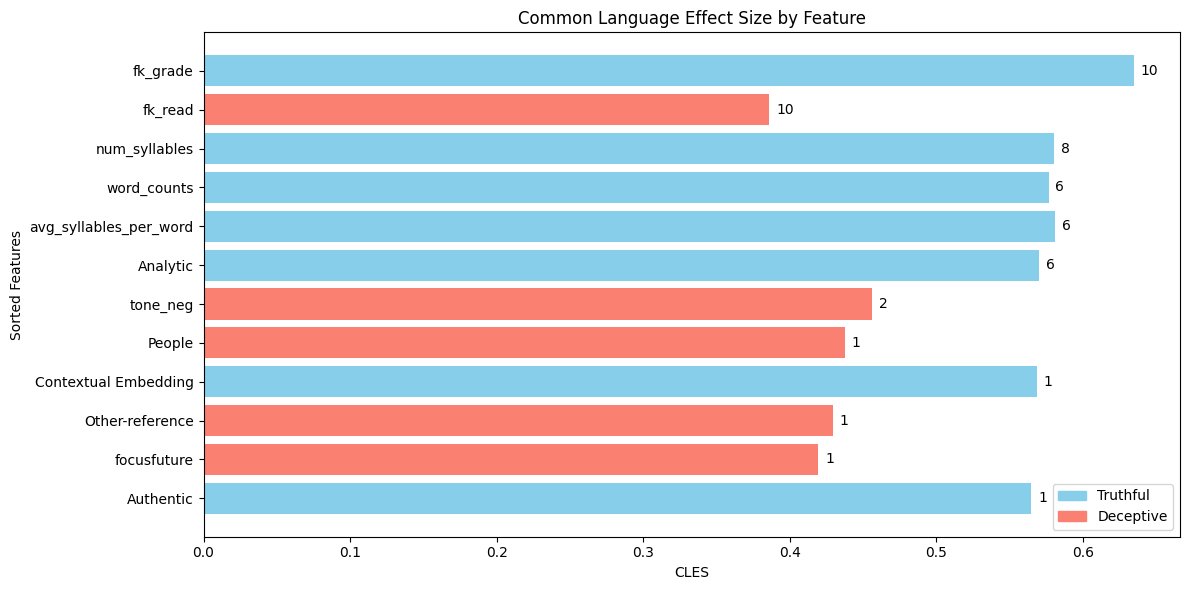

In [ ]:
# Create a horizontal bar chart of effect size with an increased figure size
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size (width, height) as needed

# Define colors based on the stat value
colors = ['skyblue' if stat > 0 else 'salmon' for stat in perm_df_selected_stat.iloc[:,1:].mean(axis = 1)]

# Plot the bars
bars = ax.barh(perm_df_selected_cles['features'], perm_df_selected_cles['mean'], color=colors)

# Add legend
t_patch = plt.Rectangle((0, 0), 0, 0, color='skyblue', label='Truthful')
f_patch = plt.Rectangle((0, 0), 0, 0, color='salmon', label='Deceptive')
plt.legend(handles=[t_patch, f_patch], loc = 'lower right')

# Set labels
ax.set_xlabel('CLES')
ax.set_ylabel('Sorted Features')
ax.set_title('Common Language Effect Size by Feature')
ax.invert_yaxis()

# Add numerical values to the bars
perm_df_sign.reset_index(inplace = True)

for i, bar in enumerate(bars):
    count = perm_df_sign['Counts'][i]  # Get the count value for the current bar
    ax.annotate(str(count), xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

# Show the plot and adjust spacing
plt.tight_layout()
plt.show()